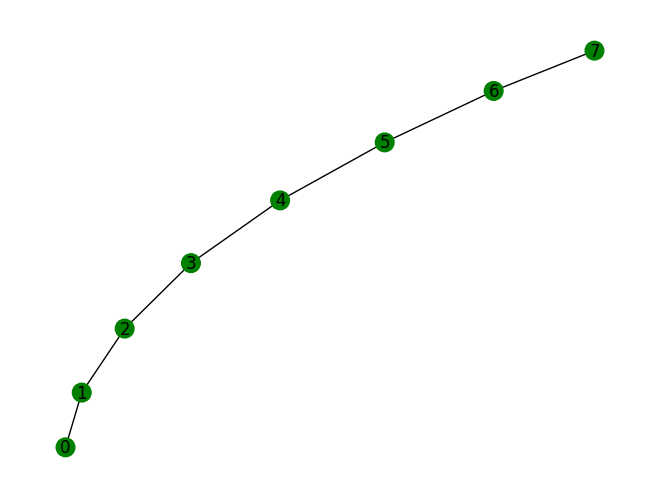

In [1]:
from disqco.circuits.cp_fraction import cp_fraction, cz_fraction
from disqco.graphs.GCP_hypergraph import QuantumCircuitHyperGraph
from qiskit import transpile
from disqco.parti.FM.FM_methods import set_initial_partitions
from disqco.circuits.QAOA import QAOA_random
from qiskit.circuit.library import QFT, QuantumVolume  
from disqco.graphs.quantum_network import QuantumNetwork, linear_coupling, grid_coupling, random_coupling

import pickle

num_qubits = 64

circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.5)

num_qubits = circuit.num_qubits

circuit = transpile(circuit, basis_gates = ['cp', 'u'])

num_partitions = 8


qpu_sizes = [int(num_qubits/num_partitions)+1]*num_partitions

coupling = [[i, i+1] for i in range(num_partitions-1)]

network = QuantumNetwork(qpu_sizes, coupling)

network.draw()



In [2]:
graph = QuantumCircuitHyperGraph(circuit, group_gates = True, anti_diag = True)
assignment = set_initial_partitions(network=network, num_qubits=num_qubits, depth=graph.depth)

from disqco.parti.FM.FM_methods import get_all_configs, get_all_costs_hetero

if num_partitions <=10:

    configs = get_all_configs(num_partitions, hetero=True)

    costs, edge_tree = get_all_costs_hetero(network, configs)
else:

    costs = {}

print(costs)

{((0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1)): 0, ((0, 0, 0, 1, 1, 1, 1, 1), (1, 1, 1, 0, 1, 1, 1, 0)): 3, ((0, 0, 0, 1, 1, 1, 1, 1), (1, 0, 0, 1, 0, 1, 1, 1)): 3, ((0, 0, 0, 1, 1, 1, 1, 1), (1, 1, 0, 0, 0, 0, 0, 1)): 3, ((0, 0, 0, 1, 1, 1, 1, 1), (1, 1, 1, 0, 1, 0, 0, 1)): 3, ((0, 0, 0, 1, 1, 1, 1, 1), (0, 1, 1, 1, 0, 0, 1, 1)): 2, ((0, 0, 0, 1, 1, 1, 1, 1), (1, 1, 0, 0, 0, 1, 0, 1)): 3, ((0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 0, 1, 0, 1, 0, 0)): 0, ((0, 0, 0, 1, 1, 1, 1, 1), (1, 1, 1, 0, 1, 1, 0, 1)): 3, ((0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 0, 1, 0, 1)): 1, ((0, 0, 0, 1, 1, 1, 1, 1), (1, 1, 0, 1, 1, 0, 0, 0)): 3, ((0, 0, 0, 1, 1, 1, 1, 1), (0, 1, 0, 0, 1, 0, 1, 1)): 2, ((0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 0, 1, 0, 1, 1, 1)): 0, ((0, 0, 0, 1, 1, 1, 1, 1), (1, 0, 1, 0, 1, 1, 1, 0)): 3, ((0, 0, 0, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 0, 1, 1)): 2, ((0, 0, 0, 1, 1, 1, 1, 1), (0, 1, 0, 0, 1, 1, 0, 0)): 2, ((0, 0, 0, 1, 1, 1, 1, 1), (1, 0, 1, 0, 0, 1, 0, 1)): 3, ((0, 0, 0, 1, 1, 1, 1, 1), (0,

In [11]:
from disqco.parti.FM.FM_hetero import run_FM_hetero

final_cost, final_assignment, cost_list = run_FM_hetero(hypergraph=graph,
                                                        initial_assignment=assignment,
                                                        qpu_info=qpu_sizes,
                                                        num_partitions=num_partitions,
                                                        network=network,
                                                        limit=num_qubits,
                                                        costs={},
                                                        passes=50,
                                                        log=True)





Initial cost: 1490
All passes complete.
Final cost: 1467


In [4]:
from disqco.drawing.tikz_drawing import draw_graph_tikz
from disqco.drawing.mpl_drawing import draw_graph_mpl

%load_ext jupyter_tikz

# if num_qubits <= 32:
#     draw_graph_tikz(graph, assignment, qpu_sizes)
# else:
#     if num_qubits <= 64:
#         draw_graph_mpl(graph, assignment, qpu_sizes)

In [5]:
# print("Final cost: ", final_cost)
import qiskit
qiskit.__version__

'1.2.4'

In [6]:
from disqco.parti.FM.multilevel_FM import MLFM_recursive_hetero

print(qpu_sizes)

final_assignment_list, final_cost_list, _ = MLFM_recursive_hetero(graph,
                                                                    assignment,
                                                                    qpu_sizes,
                                                                    limit=num_qubits,
                                                                    network=network,
                                                                    log=True,
                                                                    stochastic=True,
                                                                    costs=costs, 
                                                                    level_limit=None)





[9, 9, 9, 9, 9, 9, 9, 9]
Initial cost: 1490
All passes complete.
Final cost: 1270
Best cost at level 0: 1270
Initial cost: 1270
All passes complete.
Final cost: 1237
Best cost at level 1: 1237
Initial cost: 1237
All passes complete.
Final cost: 1216
Best cost at level 2: 1216
Initial cost: 1216
All passes complete.
Final cost: 1180
Best cost at level 3: 1180
Initial cost: 1180
All passes complete.
Final cost: 1157
Best cost at level 4: 1157
Initial cost: 1157
All passes complete.
Final cost: 1146
Best cost at level 5: 1146
Initial cost: 1146
All passes complete.
Final cost: 1141
Best cost at level 6: 1141


In [7]:

import numpy as np

final_assignment = final_assignment_list[np.argmin(final_cost_list)]

counts = []

for layer in final_assignment:
    counts.append(np.bincount(layer))
    print(layer)

print(counts)
# if num_qubits <= 32:
#     fig = draw_graph_tikz(graph, final_assignment, qpu_sizes)
#     display(fig)
# else:
#      draw_graph_mpl(graph, final_assignment, qpu_sizes)

[0 5 4 5 5 4 0 5 3 6 4 3 0 2 2 3 7 6 2 0 7 4 6 5 6 1 4 5 6 1 6 3 3 3 4 6 1
 1 3 0 6 1 4 0 4 3 0 2 3 5 0 2 1 1 2 2 6 2 5 1 4 1 5 2]
[0 5 4 5 5 4 0 5 3 6 4 2 0 2 2 3 7 6 2 0 7 4 6 5 6 1 4 5 6 1 6 1 3 3 4 6 1
 1 3 0 6 1 4 0 4 3 0 2 3 5 0 2 1 2 2 3 6 3 5 1 4 1 5 2]
[0 5 4 5 5 4 0 5 3 6 4 2 0 2 2 3 7 6 2 0 7 4 2 5 6 1 4 5 6 1 6 0 3 3 4 6 1
 1 3 0 6 1 3 0 4 3 0 2 6 5 0 2 1 3 2 3 6 4 5 1 4 1 5 1]
[0 5 4 5 5 4 0 5 3 6 4 2 0 2 2 3 7 6 2 0 7 3 2 4 6 1 4 5 6 1 6 0 3 3 4 6 1
 1 3 0 6 1 3 0 4 5 0 2 6 5 0 2 1 3 2 3 6 4 5 1 4 1 5 1]
[1 5 4 5 6 4 0 5 2 6 4 2 5 3 2 3 7 6 2 3 7 2 2 4 0 1 4 5 6 1 6 0 3 3 4 6 1
 1 3 0 6 1 3 0 4 5 0 2 6 5 0 2 1 3 2 3 6 4 5 1 4 0 5 1]
[1 5 4 5 6 4 0 5 2 6 4 2 5 3 2 3 7 6 2 3 7 2 2 4 0 1 4 5 6 1 6 0 3 3 4 6 2
 1 3 0 6 1 3 0 4 5 0 2 6 5 0 1 1 3 2 3 6 4 5 1 4 0 5 1]
[1 5 4 5 6 4 0 5 2 6 4 2 5 3 2 3 7 6 2 3 7 2 2 4 0 0 4 5 6 1 6 0 3 3 4 6 2
 1 3 0 6 1 3 0 4 5 0 2 6 5 0 1 1 3 2 3 6 4 5 1 4 0 5 1]
[1 5 4 5 6 4 0 5 2 6 4 2 5 3 2 3 6 7 2 3 7 2 2 4 0 0 4 5 6 1 6 0 3 3 4 6 2
 1 3 0 6

In [8]:
from disqco.parti.FM.multilevel_FM import MLFM_recursive

list_of_assignments, list_of_costs, _ = MLFM_recursive(
    graph,
    assignment,
    qpu_sizes,
    limit='qubit',
    log=True)

from disqco.graphs.hypergraph_methods import calculate_full_cost_hetero
import numpy as np

best_assignment = list_of_assignments[np.argmin(list_of_costs)]
print("best assignment", best_assignment)
cost_hetero = calculate_full_cost_hetero(graph, best_assignment, num_partitions, costs, network)

print(cost_hetero)

Initial cost: 746
All passes complete.
Final cost: 631
Best cost at level 0: 631
Initial cost: 631
All passes complete.
Final cost: 607
Best cost at level 1: 607
Initial cost: 607
All passes complete.
Final cost: 586
Best cost at level 2: 586
Initial cost: 586
All passes complete.
Final cost: 560
Best cost at level 3: 560
Initial cost: 560
All passes complete.
Final cost: 552
Best cost at level 4: 552
Initial cost: 552
All passes complete.
Final cost: 550
Best cost at level 5: 550
Initial cost: 550
All passes complete.
Final cost: 549
Best cost at level 6: 549
best assignment [[2 4 0 ... 7 3 2]
 [2 4 0 ... 7 3 2]
 [2 4 0 ... 7 3 2]
 ...
 [2 7 7 ... 3 6 3]
 [2 7 7 ... 3 6 7]
 [2 7 7 ... 3 6 1]]
1515


In [9]:
from disqco.utils.qiskit_to_op_list import circuit_to_gate_layers
layers = circuit_to_gate_layers(circuit)

for layer in layers:
    for gate in layer:
        print(gate)
        # print(gate.qargs)
        # print(gate.op.name)
        # print(gate.op.params)
        # print(gate.op.to_dict())
        # print(gate.op.to_matrix())
        # print(gate.op.to_instruction())
        # print(gate.op.to_gate())
        # print(gate.op.to_circuit())

['u', [1], ['q'], [2.952916224616217, 3.6397248926433865, 4.111227413382905]]
['u', [3], ['q'], [2.007379373272631, 2.4393656210380774, -1.9513324736435171]]
['u', [4], ['q'], [2.2493748167950796, 1.7220697379924876, 2.002129020252924]]
['u', [5], ['q'], [0.6394240338309181, 1.9759028643267005, 0.35819649460838576]]
['u', [6], ['q'], [2.514561867356514, -2.4362184580764223, -2.6585193701558216]]
['u', [8], ['q'], [1.6494015379177622, 2.466781514288564, 0.061054669100390146]]
['cp', [10, 0], ['q', 'q'], [2.925348750085643]]
['u', [13], ['q'], [3.860380774316104, 0.21772107566203197, 2.460911160918968]]
['u', [14], ['q'], [2.0390201736813443, -2.505326643985934, 1.8726984380860703]]
['cp', [15, 11], ['q', 'q'], [2.2211015496711184]]
['u', [16], ['q'], [1.4776597673448408, 2.830322417450919, -0.6313493999426498]]
['u', [18], ['q'], [0.03198673821457773, 3.2192553255213285, 3.0953605545478737]]
['u', [19], ['q'], [1.9537934111574644, 2.2817545566900392, 1.2718882250103647]]
['u', [20], ['q